Top Sentences: 

1 :  The venue was so outdated the only good thing were the flour tortillasFirst of all to those calling this neighborhood a ghetto its not ,it is a barrio phoenix original barrio,and it is home to the oldest Mexican street gang which leads to the start of my review,yes Carolinas is a hole in the wall restaurant which i choose to order and dash i wont eat there,for some reason the locals will not mess with you or your car so you are safe  being there.the place is a bit on the dirty side, but damn it they have the best tortillas and green Chile burritos,their chorrizo is all right but not worth the price.Once upon a time their burritos where huge and full of meat but it seems since Carolina (respectfully)passed away her children have become stingy with the meat.Every chance i get when coming home from the east valley i stop there,but i usually go to the Peoria location.The place is a hole in the wall right behind the PHX car rental center.
2 :  I guess to each his own b

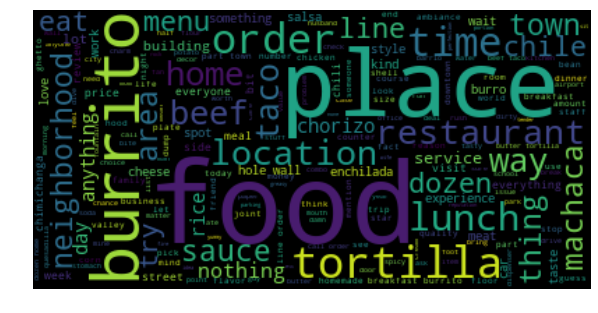

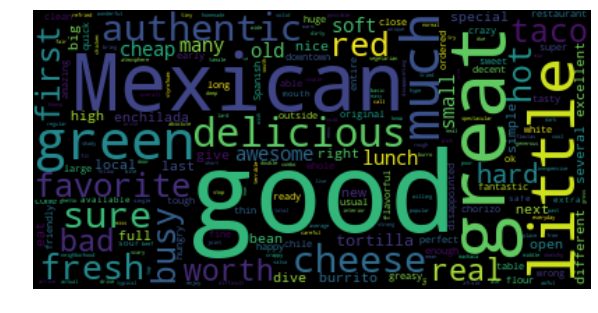

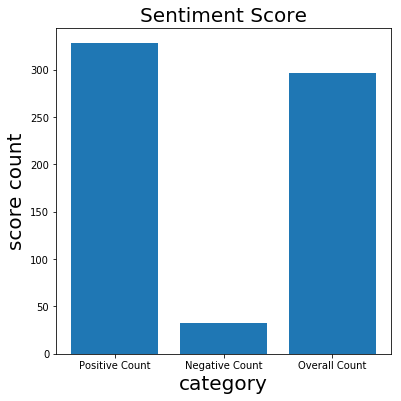


Restaurant Review On a scale of (-1) - (+1)
Overall sentiment score:  0.24312631897490122


In [6]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk import FreqDist
import numpy as np
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud

# Function which return the stop word list of a given language
def getStopWords(language):
    return set(stopwords.words(language))

# Function which get the user review 
def getInputData(fileName):
    df = pd.read_csv(fileName)
    inputReviews = df['text_review']
    return inputReviews

# Function which returns the text review of user as a string
def getInputAsString (inputReviews):
    inputString = ''
    for i in inputReviews:
        inputString += str(i)
    return inputString

# Function which removes all the punctuation from the from the string
def getPunctuationFreeList(inputString):
    tokenizer = RegexpTokenizer(r'\w+')          
    punctuationFreeList = tokenizer.tokenize(inputString)
    return punctuationFreeList

# Function which removes the number from the list
def getNumberFreeList(punctuationFreeList):
    numberFreeList = []
    for i in punctuationFreeList:
        if i.isnumeric() != True :
            numberFreeList.append(i)
    return numberFreeList

# Function which returns the list of tokenised sentence
def getSentenceTokenisedList(inputString):
    sentenceTokenisedList = sent_tokenize(inputString)
    return sentenceTokenisedList

# Function which returns the list of tokenised words
def getWordTokensiedList(sentenceTokenisedList):
    sentenceMappingList = []
    for i in sentenceTokenisedList:
        sentenceMappingList.append(i.split(" "))
    return sentenceMappingList

# Function which removes all the stop words from a list
def getStopWordFreeList(stopWordsList,numberFreeList):
    stopWordFreeList = []
    for i in numberFreeList:
        if i.lower() not in stopWordsList:
            stopWordFreeList.append(i)
    return stopWordFreeList

# Function for getting the frequency of each word in the given list
def getFrequencyDistribution(stopWordsFreeList):
    freqDistribution = FreqDist(stopWordsFreeList)
    return freqDistribution

# Function which computes the score of each sentence and retruns the dictionary 
# Dictionary format = sentenceIndex : score
def getSentenceScore(wordsTokenisedList,frequencyDistribution):
    scoreDictionary = {}
    for i in range(len(wordsTokenisedList)):
        score = 0
        for j in wordsTokenisedList[i]:
            if j in frequencyDistribution:
                score += frequencyDistribution[j]
            else:
                # Checking for those words whose frequency exsist but in the actual sentence
                # they have either special symbol or some number either as suffix or prefix
                # Example : Great!!
                tokenizer = RegexpTokenizer(r'\w+')
                tempList = tokenizer.tokenize(j)
                for k in tempList:
                    if k in frequencyDistribution:
                        score += frequencyDistribution[k]  
        scoreDictionary[i] = score
    return scoreDictionary

# Function which sorts the score dictionary and returns index corresponding to the top score 
# as a list
def getTopSentenceIndex(number, sentenceScoreDictionary):
    sortedScoreDictionary = {}
    topSentenceIndex = []
    sortedScoreDictionary = sorted(sentenceScoreDictionary.items(), key= lambda kv: kv[1], 
                                   reverse=True)[:number]
    for i in sortedScoreDictionary:
        topSentenceIndex.append(i[0])
    return topSentenceIndex

# Function for getting the top sentence in the given data
def topSentence(stopWordsFreeList, sentenceTokenisedList, wordTokenisedList):
    FrequencyDistribution = getFrequencyDistribution(stopWordsFreeList)
    sentenceScoreDictionary = getSentenceScore(wordTokenisedList,FrequencyDistribution)
    topSentenceIndex = getTopSentenceIndex(5,sentenceScoreDictionary)
    printTopSentence(topSentenceIndex,sentenceTokenisedList)

# Printing the top senetence in the given corpus
def printTopSentence(topSentenceIndex, sentenceTokenisedList):
    print("Top Sentences: \n")
    sentenceNumber = 1
    for i in topSentenceIndex:
        print(sentenceNumber,": ",sentenceTokenisedList[i])
        sentenceNumber += 1
        
# Function which forms the word cloud for a given list
def getWordCloud(wordCloudString):
    wordCloud = WordCloud(max_font_size = 80).generate(wordCloudString)
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Function which perfrom POS tagging
def performTagging(stopWordsFreeList):
    stopWordsFreeString = ' '.join(stopWordsFreeList)
    blob = TextBlob(stopWordsFreeString)
    blob = blob.tags
    nounList = []
    adjectiveList = []
    for i in blob:
        if i[1] == 'NN':
            nounList.append(i[0])
        elif i[1] == 'JJ':
            adjectiveList.append(i[0])
        else:
            continue
    nounString = ' '.join(nounList)
    adjectiveString = ' '.join(adjectiveList)
    getWordCloud(nounString)
    getWordCloud(adjectiveString)
    
def barGraph(score, category):
    plt.figure(figsize = (6, 6))
    plt.bar(category, score)
    plt.xlabel('category', fontsize = 20)
    plt.ylabel('score count', fontsize = 20)
    plt.title('Sentiment Score', fontsize = 20)
    plt.show()
    
# Function for gettint the overall review score of a restaurant
# sentiment is calculated by by passing reviews to sentiment function and note sentence
def restaurantReview(inputReviews):
    positiveScore = 0
    negativeScore = 0
    overallScore = 0
    positiveReviewCount  = 0
    negativeReviewCount = 0
    overallReviewCount = 0
    for i in inputReviews:
        if isinstance(i,str):
            sentimentTuple = TextBlob(i).sentiment
            if sentimentTuple[0] < 0:
                negativeScore += sentimentTuple[0]
                negativeReviewCount += 1
            else:
                positiveScore += sentimentTuple[0]
                positiveReviewCount += 1
    
    overallScore = (positiveScore + negativeScore)/(positiveReviewCount + negativeReviewCount)
    overallReviewCount = positiveReviewCount - negativeReviewCount
    score = [positiveReviewCount, negativeReviewCount, overallReviewCount]
    category = ['Positive Count','Negative Count', 'Overall Count']
    barGraph(score, category)

    print("\nRestaurant Review On a scale of (-1) - (+1)")
    print("Overall sentiment score: ", overallScore)
    
# Function which gets meaningful insights about a given restaurant
def extractInsights(inputFileName):
    inputReviews = getInputData(inputFileName)
    inputString = getInputAsString(inputReviews)
    sentenceTokenisedList = getSentenceTokenisedList(inputString)
    wordTokenisedList = getWordTokensiedList(sentenceTokenisedList)
    punctuationFreeList = getPunctuationFreeList(inputString)
    numberFreeList = getNumberFreeList(punctuationFreeList)
    stopWordsList = getStopWords('english')
    stopWordsFreeList = getStopWordFreeList(stopWordsList, numberFreeList)
    topSentence(stopWordsFreeList, sentenceTokenisedList, wordTokenisedList)
    performTagging(stopWordsFreeList)
    restaurantReview(inputReviews)  
    
if __name__ == "__main__":

    inputFileName = "Carolina'sMexicanFood.csv"
    extractInsights(inputFileName)